# 5.3 Clustering


**Goal**: Identify groups of days with similar consumption profiles.

● Evaluation:

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


daily = pd.read_csv("daily_household.csv")


daily["First_Ratio"] = daily["Sub_metering_1"] / daily["Global_active_power"]
daily["Second_Ratio"] = daily["Sub_metering_2"] / daily["Global_active_power"]
daily["Third_Ratio"] = daily["Sub_metering_3"] / daily["Global_active_power"]
avg_power_kw = daily["Global_active_power"] / 24
daily["Load_Factor"] = avg_power_kw / daily["peak_hour_power"]

In [26]:
cols_to_scale = daily.drop(columns=["Datetime"]).columns

scaled = daily.copy()

scaler = MinMaxScaler(feature_range=(0, 1))
scaled[cols_to_scale] = scaler.fit_transform(daily[cols_to_scale])

In [27]:
selected_features = [
    "Global_intensity",
    "peak_hour_power",  
    "night_time_usage",  
    "is_working_Day",   
    "First_Ratio",    
    "Second_Ratio",
    "Third_Ratio",
    "Load_Factor",
    "Season_Autumn",
    "Season_Spring",
    "Season_Summer",	
    "Season_Winter"
]

X = scaled[selected_features].copy()

In [28]:
from sklearn.cluster import AgglomerativeClustering

kclu=AgglomerativeClustering(n_clusters=8,linkage="ward")
labels = kclu.fit_predict(X)
scaled["Cluster"] = labels

In [29]:
from sklearn import metrics

metrics.silhouette_score(X, scaled["Cluster"], metric="euclidean")

np.float64(0.608175190789046)

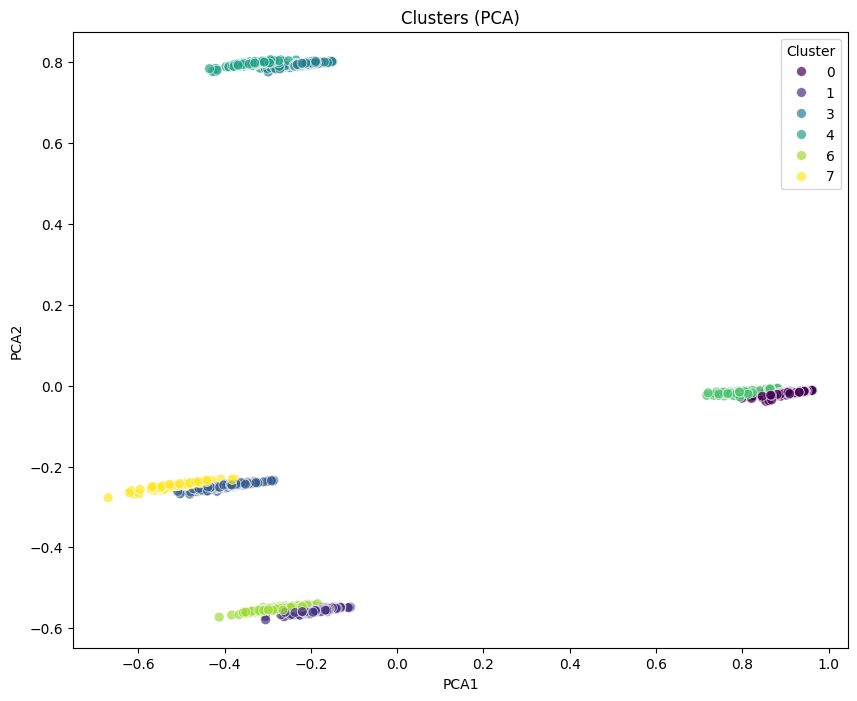

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X) 

pca_df = scaled.copy()
pca_df["PCA1"] = X_pca[:, 0]
pca_df["PCA2"] = X_pca[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=pca_df, 
    x="PCA1", 
    y="PCA2", 
    hue="Cluster", 
    palette="viridis", 
    s=50, 
    alpha=0.7
)
plt.title("Clusters (PCA)")
plt.legend(title="Cluster")
plt.show()

In [31]:
daily["Clusters"] = labels
daily.head()

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,peak_hour_power,night_time_usage,...,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,is_working_Day,First_Ratio,Second_Ratio,Third_Ratio,Load_Factor,Clusters
0,2006-12-16,20.152933,34.922,236.243763,13.082828,0.000,0.546,4.926,7.706,1017.334,...,False,False,False,True,0,0.000000,0.027093,0.244431,0.108968,7
1,2006-12-17,56.507667,226.006,240.087028,9.999028,2.033,4.187,13.341,7.064,267.578,...,False,False,False,True,0,0.035977,0.074096,0.236092,0.333308,7
2,2006-12-18,36.730433,161.792,241.231694,6.421667,1.063,2.621,14.018,6.158,344.776,...,False,False,False,True,1,0.028941,0.071358,0.381645,0.248528,2
3,2006-12-19,27.769900,150.942,241.999313,4.926389,0.839,7.602,6.197,7.840,208.098,...,False,False,False,True,1,0.030213,0.273750,0.223155,0.147587,2
4,2006-12-20,37.095800,160.998,242.308063,6.467361,0.000,2.648,14.063,5.988,629.370,...,False,False,False,True,1,0.000000,0.071383,0.379100,0.258126,2


In [35]:
daily.groupby("Clusters")[["Global_active_power", "Season_Autumn", "Season_Spring", "Season_Summer", "Season_Winter", "is_working_Day"]].mean(numeric_only=True)

,Global_active_power,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,is_working_Day
Clusters,,,,,,
0,16.945348,0.0,0.0,1.0,0.0,1.0
1,26.290859,1.0,0.0,0.0,0.0,1.0
2,31.801239,0.0,0.0,0.0,1.0,1.0
3,24.963617,0.0,1.0,0.0,0.0,1.0
4,29.687810,0.0,1.0,0.0,0.0,0.0
5,18.959186,0.0,0.0,1.0,0.0,0.0
6,29.676318,1.0,0.0,0.0,0.0,0.0
7,39.500590,0.0,0.0,0.0,1.0,0.0
